In [242]:
import numpy as np
import pandas as pd

In [243]:
primer_df = pd.read_csv("../../data/primer-data-challenge/data.csv", sep=",")


In [244]:
primer_df.head()

,created_at,amount_usd,currency,payment_instrument_type,card_brand,issuing_country,authorized
0,04-28-2021 22:26:03,30053,USD,PAYMENTCARD,VISA,US,0
1,04-12-2021 16:50:56,372591,USD,PAYMENTCARD,VISA,IE,1
2,01-16-2021 12:15:14,343577,AUD,PAYMENTCARD,MASTERCARD,US,0
3,02-23-2021 19:52:59,165203,GBP,KLARNA,AMEX,GB,1
4,03-13-2021 04:18:03,47651,USD,PAYMENTCARD,VISA,US,1


In [245]:
primer_df.created_at = pd.to_datetime(primer_df.created_at)

In [246]:
# Convert date in created_at date to ordinal values
import datetime as dt
primer_df.created_at = primer_df.created_at.map(dt.datetime.toordinal)

In [247]:
primer_df.created_at

0       737908
1       737892
2       737806
3       737844
4       737862
         ...  
9995    737884
9996    737822
9997    737812
9998    737902
9999    737830
Name: created_at, Length: 10000, dtype: int64

In [248]:
primer_df.currency = primer_df.currency.astype('category')
primer_df.payment_instrument_type = primer_df.payment_instrument_type.astype('category')
primer_df.card_brand = primer_df.card_brand.astype('category')
primer_df.issuing_country = primer_df.issuing_country.astype('category')

In [249]:
primer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   created_at               10000 non-null  int64   
 1   amount_usd               10000 non-null  int64   
 2   currency                 10000 non-null  category
 3   payment_instrument_type  10000 non-null  category
 4   card_brand               10000 non-null  category
 5   issuing_country          10000 non-null  category
 6   authorized               10000 non-null  int64   
dtypes: category(4), int64(3)
memory usage: 274.3 KB


In [250]:
from sklearn.preprocessing import OrdinalEncoder

# run OrdinalEncoder on all columns
categorical_columns = ["currency", "payment_instrument_type", "card_brand", "issuing_country"]
ord_enc = OrdinalEncoder()

for feat in categorical_columns:
    primer_df[feat] = ord_enc.fit_transform(primer_df[[feat]])

In [251]:
primer_df.head()

,created_at,amount_usd,currency,payment_instrument_type,card_brand,issuing_country,authorized
0,737908,30053,5.0,3.0,2.0,3.0,0
1,737892,372591,5.0,3.0,2.0,2.0,1
2,737806,343577,0.0,3.0,1.0,3.0,0
3,737844,165203,3.0,2.0,0.0,1.0,1
4,737862,47651,5.0,3.0,2.0,3.0,1


In [252]:
primer_df.authorized.value_counts()

1    8330
0    1670
Name: authorized, dtype: int64

In [253]:
# What is the overall authorization rate?
primer_df[primer_df.authorized == 1].authorized.count() / len(primer_df)

0.833

In [254]:
# Which payment_instrument_type has the highest authorization rate?
primer_df.groupby(by=["payment_instrument_type"])["authorized"].value_counts()

payment_instrument_type  authorized
0.0                      1              662
                         0              128
1.0                      1              163
                         0               40
2.0                      1              418
                         0               82
3.0                      1             5412
                         0             1100
4.0                      1             1675
                         0              320
Name: authorized, dtype: int64

In [255]:
primer_df[primer_df.authorized == 1].groupby(by=["payment_instrument_type"])["authorized"].value_counts() / primer_df.groupby(by=["payment_instrument_type"]).size()

payment_instrument_type  authorized
0.0                      1             0.837975
1.0                      1             0.802956
2.0                      1             0.836000
3.0                      1             0.831081
4.0                      1             0.839599
dtype: float64

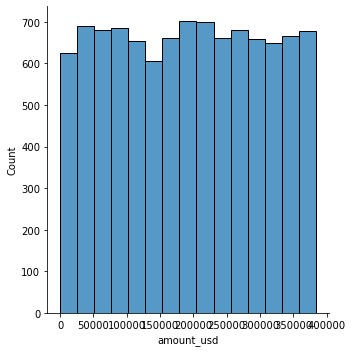

In [256]:
import seaborn as sns
sns.displot(primer_df.amount_usd, bins = 15)

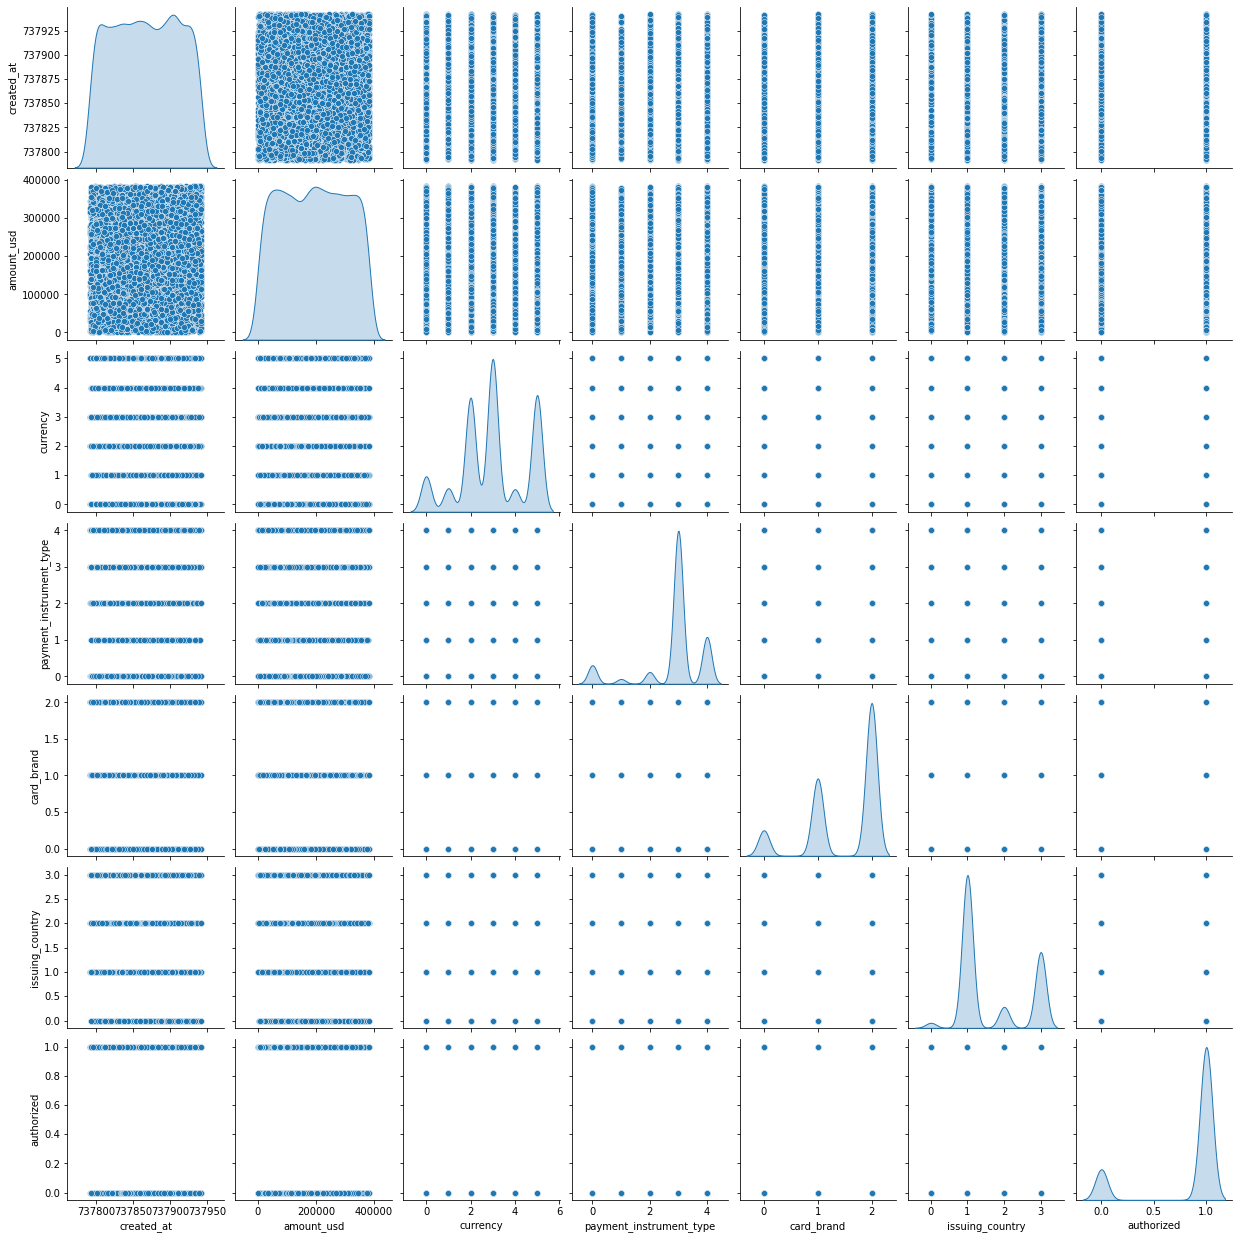

In [257]:
sns.pairplot(data = primer_df, kind="scatter", diag_kind="kde")

In [258]:
primer_df.corr()
# amount_usd and authorized seem to be strongly negatively correlated

,created_at,amount_usd,currency,payment_instrument_type,card_brand,issuing_country,authorized
created_at,1.000000,0.012514,0.005653,-0.014241,-0.009864,0.002312,-0.000892
amount_usd,0.012514,1.000000,-0.000796,0.007210,0.007878,-0.011112,-0.107461
currency,0.005653,-0.000796,1.000000,0.014314,0.003981,0.028605,-0.035267
payment_instrument_type,-0.014241,0.007210,0.014314,1.000000,0.003635,0.004314,0.003197
card_brand,-0.009864,0.007878,0.003981,0.003635,1.000000,0.004980,-0.002269
issuing_country,0.002312,-0.011112,0.028605,0.004314,0.004980,1.000000,-0.020711
authorized,-0.000892,-0.107461,-0.035267,0.003197,-0.002269,-0.020711,1.000000


In [259]:
ord_enc.inverse_transform(primer_df[["card_brand"]])

array([['IE'],
       ['IE'],
       ['GB'],
       ...,
       ['IE'],
       ['GB'],
       ['AU']], dtype=object)

In [260]:
primer_df.head()

,created_at,amount_usd,currency,payment_instrument_type,card_brand,issuing_country,authorized
0,737908,30053,5.0,3.0,2.0,3.0,0
1,737892,372591,5.0,3.0,2.0,2.0,1
2,737806,343577,0.0,3.0,1.0,3.0,0
3,737844,165203,3.0,2.0,0.0,1.0,1
4,737862,47651,5.0,3.0,2.0,3.0,1


In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

target_values = ["created_at", "amount_usd", "currency", "payment_instrument_type", "card_brand", "issuing_country"]

X = primer_df[target_values].copy()
y = primer_df["authorized"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [262]:
# Choose most important features
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train, X_test, fs = select_features(X_train, y_train, X_test)

In [263]:
# Train logistic regression model
l_model = LogisticRegression(class_weight='balanced')
l_model.fit(X=X_train, y=y_train)

LogisticRegression(class_weight='balanced')

In [264]:
l_model.score(X_train, y_train)

0.5502666666666667

In [265]:
y_test_hat = l_model.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_test_hat)

0.5388

In [266]:
unique, counts = np.unique(y_test_hat, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1157]
 [   1 1343]]


In [267]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, l_model.predict_proba(X_test)[:, 1])


0.565647619047619

In [268]:
# Perform hyperparameter search for logistic regression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

l_model = LogisticRegression(class_weight="balanced")
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.5, 1, 1.5]},
    {'penalty': ['l2'], 'solver': ['newton-cg'], 'C': [0.5, 1, 1.5]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.5, 1, 1.5]}
]
clf = GridSearchCV(estimator=l_model, param_grid=param_grid)
clf.fit(X=X, y=y)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid=[{'C': [0.5, 1, 1.5], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.5, 1, 1.5], 'penalty': ['l2'],
                          'solver': ['newton-cg']},
                         {'C': [0.5, 1, 1.5], 'penalty': ['elasticnet'],
                          'solver': ['saga']}])

In [269]:
# Get optimal parameters
clf.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [270]:
clf.best_score_

0.5484